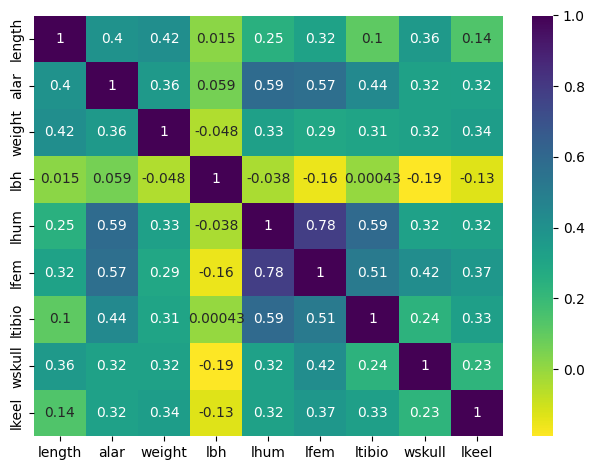

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pardocas.csv', sep=',', header=0)
df.head(8)


df_data = pd.read_csv('pardocas.txt', header=0, sep='\t')
df_data.shape
df_data.head(5)

features = ['length', 'alar', 'weight', 'lbh', 'lhum',
            'lfem', 'ltibio', 'wskull', 'lkeel']

x = df_data.loc[:, features].values


y = list(df_data['survive'])


sns.heatmap(df_data[features].corr(),
            cmap = 'viridis_r', annot = True)
plt.tight_layout()
plt.show()

<Figure size 900x900 with 0 Axes>

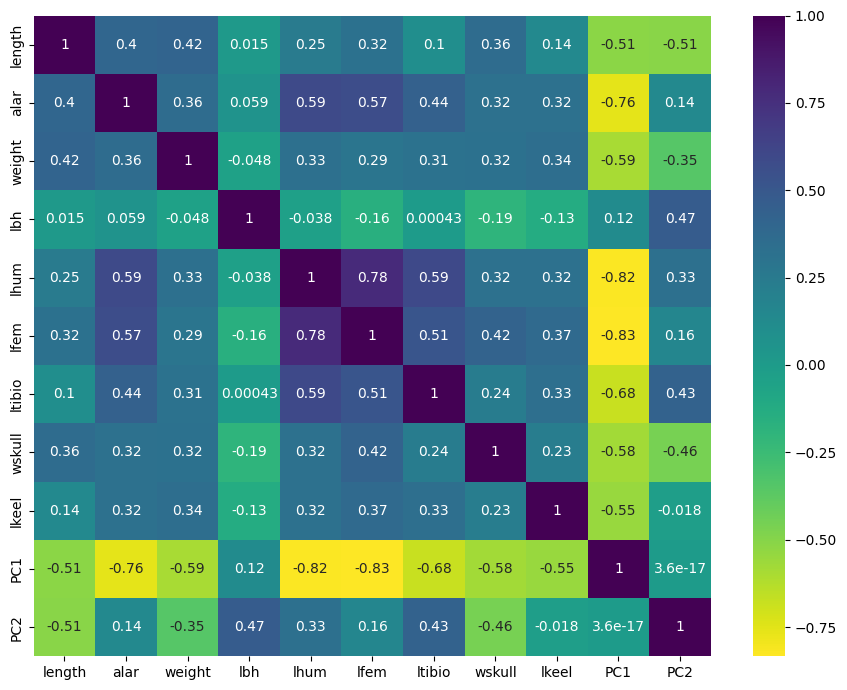

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = 'pardocas.txt'

df_data = pd.read_csv(file_path, sep='\t')

features = ['length', 'alar', 'weight', 'lbh', 'lhum',
            'lfem', 'ltibio', 'wskull', 'lkeel']

x = df_data.loc[:, features].values

y = list(df_data['survive'])

plt.figure(figsize=(9,9))
cmap = 'viridis_r'

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data[features])

pca = PCA()
principalComponents = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=principalComponents, columns=features)

ls_pcs = []
for i in range(len(features)):
    tt = 'PC' + str(i+1)
    ls_pcs.append(tt)
df_pcSamples = pd.DataFrame(principalComponents,
                            columns=ls_pcs)
df_pcSamples['SAMPLE'] = y

plt.figure(figsize=(9, 7))
sns.heatmap(pd.concat([df_data.iloc[:, 1:],
                       df_pcSamples.iloc[:, 0:2]],
                      axis=1).corr(),
            cmap='viridis_r', annot=True)
plt.tight_layout()

plt.show()

<Figure size 900x900 with 0 Axes>

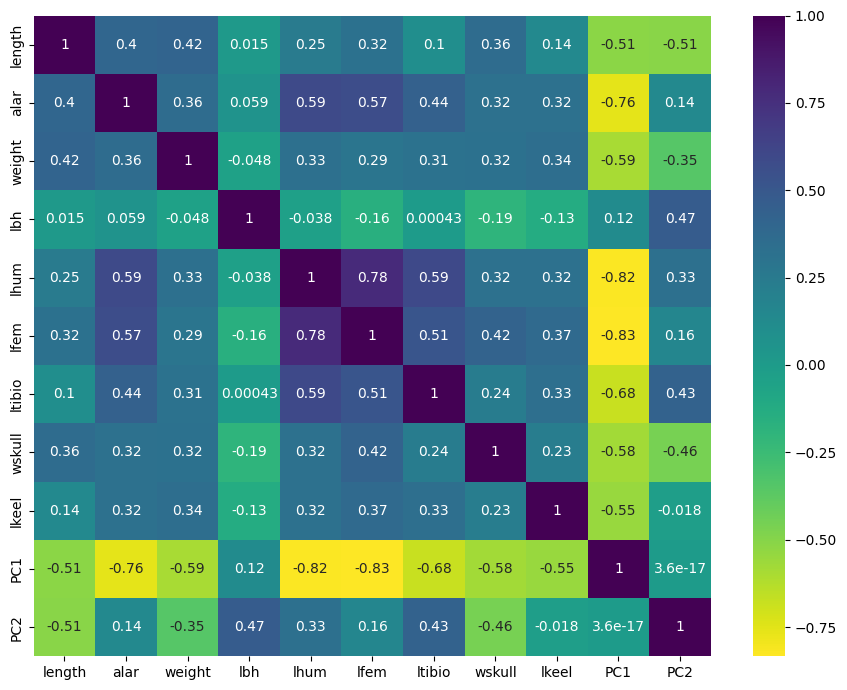

([<matplotlib.axis.XTick at 0x7ab9be0800a0>,
 [Text(-1.0, 0, '−1'), Text(0.0, 0, '0'), Text(1.0, 0, '1')])

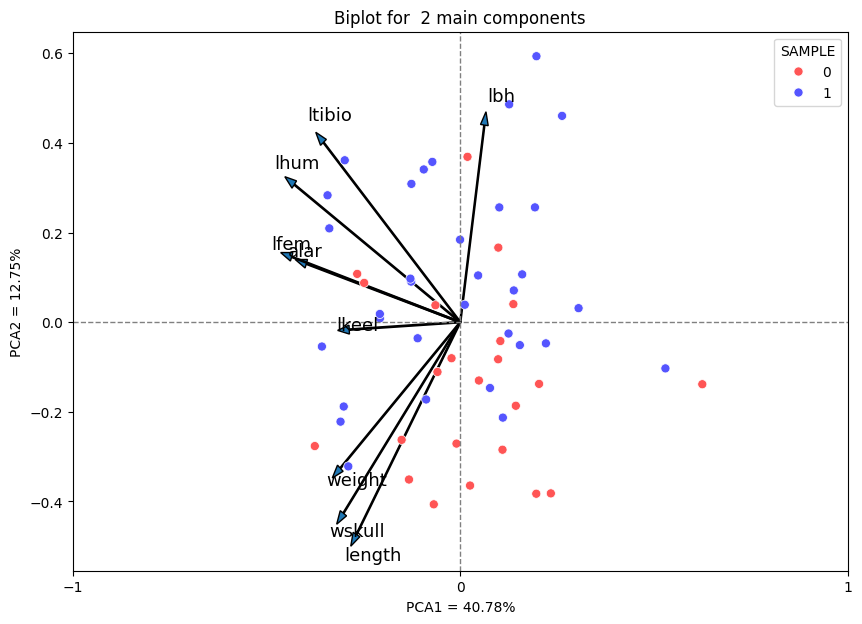

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = 'pardocas.txt'

df_data = pd.read_csv(file_path, sep='\t')

features = ['length', 'alar', 'weight', 'lbh', 'lhum',
            'lfem', 'ltibio', 'wskull', 'lkeel']

x = df_data.loc[:, features].values

y = list(df_data['survive'])

plt.figure(figsize=(9,9))
cmap = 'viridis_r'

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data[features])

pca = PCA()
principalComponents = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=principalComponents, columns=features)

ls_pcs = []
for i in range(len(features)):
    tt = 'PC' + str(i+1)
    ls_pcs.append(tt)
df_pcSamples = pd.DataFrame(principalComponents,
                            columns=ls_pcs)
df_pcSamples['SAMPLE'] = y

plt.figure(figsize=(9, 7))
sns.heatmap(pd.concat([df_data.iloc[:, 1:],
                       df_pcSamples.iloc[:, 0:2]],
                      axis=1).corr(),
            cmap='viridis_r', annot=True)
plt.tight_layout()

plt.show()

df_pcFeatures = pd.DataFrame()
df_pcFeatures['FEATURES'] = features
df_pcFeatures['PC1'] = list(pca.components_[0])
df_pcFeatures['PC2'] = list(pca.components_[1])
df_pcFeatures

scalex = 1.0/(df_pcSamples['PC1'].max() - df_pcSamples['PC1'].min())
scaley = 1.0/(df_pcSamples['PC2'].max() - df_pcSamples['PC2'].min())

plt.figure(figsize=(10, 7))
for i in range(len(df_pcFeatures)):
    plt.annotate(df_pcFeatures.iloc[i, 0],
                 (df_pcFeatures.iloc[i, 1]*1.12,
                  df_pcFeatures.iloc[i, 2]*1.12), size=13)

for i in range(len(df_pcFeatures)):
    plt.arrow(0, 0,  df_pcFeatures.iloc[i, 1],
              df_pcFeatures.iloc[i, 2],
              width=0.003,
              head_width=0.02)

sns.scatterplot(x=df_pcSamples['PC1']*scalex,
                y=df_pcSamples['PC2']*scaley,
                hue='SAMPLE', data=df_pcSamples,
                s=43, palette='seismic_r')

plt.axvline(0, color='gray', linestyle='dashed', linewidth=1)
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)
plt.title('Biplot for  2 main components')

ratio_pca1 = pca.explained_variance_ratio_[0] * 100
ratio_pca2 = pca.explained_variance_ratio_[1] * 100

plt.xlabel(f'PCA1 = {ratio_pca1:.2f}%')
plt.ylabel(f'PCA2 = {ratio_pca2:.2f}%')
plt.xticks(np.arange(-1, 1.1))

<ipython-input-5-66c827b813fd>:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=df_pca, palette='viridis_r')


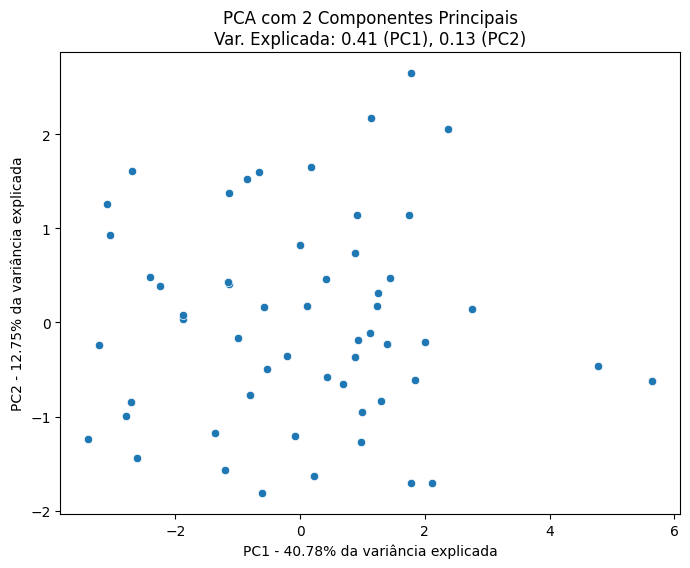

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = df_data.drop(columns=['survive'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_


df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, palette='viridis_r')
plt.title(f'PCA com 2 Componentes Principais\nVar. Explicada: {explained_variance[0]:.2f} (PC1), {explained_variance[1]:.2f} (PC2)')
plt.xlabel(f'PC1 - {explained_variance[0]*100:.2f}% da variância explicada')
plt.ylabel(f'PC2 - {explained_variance[1]*100:.2f}% da variância explicada')
plt.show()

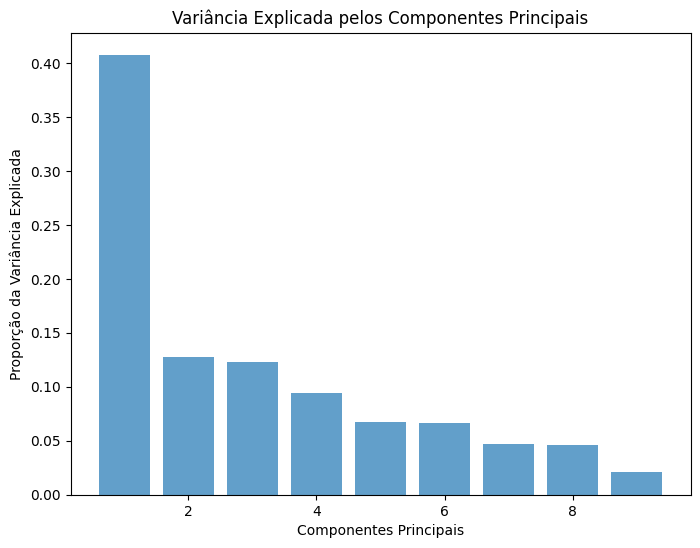

(array([0.40776612, 0.12754528, 0.12324764, 0.09435087, 0.06708555,
        0.06626353, 0.04671071, 0.04588502, 0.02114527]),
 array([[-0.26783774, -0.39735863, -0.30959091,  0.06214897, -0.4283843 ,
         -0.43513391, -0.35310511, -0.30164583, -0.28658678],
        [-0.47387676,  0.13040453, -0.32593629,  0.43985528,  0.30718038,
          0.14584854,  0.40123556, -0.42641661, -0.01660318],
        [-0.47285341, -0.21584291, -0.22965085, -0.75338264,  0.07684056,
          0.1651986 ,  0.1182015 ,  0.07165135,  0.23915689],
        [ 0.14834782,  0.10365265, -0.47725686, -0.10912913,  0.21240293,
          0.27693394, -0.10422468,  0.29645309, -0.71204715],
        [ 0.25495358,  0.13890632,  0.25850763, -0.41573072,  0.14633424,
          0.0597277 , -0.02727858, -0.75619032, -0.28017218],
        [ 0.23425875,  0.32193829, -0.5182103 ,  0.01360374, -0.01837824,
          0.17566629, -0.50681522, -0.20103217,  0.49424648],
        [-0.56047763,  0.31308454,  0.39960666,  0.0569807

In [ ]:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'pardocas.txt'


data = pd.read_csv(file_path, sep='\t')


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.ylabel('Proporção da Variância Explicada')
plt.xlabel('Componentes Principais')
plt.title('Variância Explicada pelos Componentes Principais')
plt.show()

explained_variance, pca.components_

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('pardocas.txt', delimiter='\t')

print(df.head())

def centralidade_dispersao(df, colunas):
    resultados = {}
    for coluna in colunas:
        media = df[coluna].mean()
        mediana = df[coluna].median()
        desvio_padrao = df[coluna].std()
        variancia = df[coluna].var()
        amplitude = df[coluna].max() - df[coluna].min()

        resultados[coluna] = {
            'Média': media,
            'Mediana': mediana,
            'Desvio Padrão': desvio_padrao,
            'Variância': variancia,
            'Amplitude': amplitude
        }

    return pd.DataFrame(resultados)

colunas_numericas = ['length', 'alar', 'weight', 'lbh', 'lhum', 'lfem', 'ltibio', 'wskull', 'lkeel']

resultados = centralidade_dispersao(df, colunas_numericas)

print(resultados)

   survive  length  alar  weight   lbh   lhum   lfem  ltibio  wskull  lkeel
0        1     154    41     4.5  31.0  0.687  0.668   1.000   0.587  0.830
1        0     165    40     6.5  31.0  0.738  0.704   1.095   0.606  0.847
2        0     160    45     6.1  30.0  0.736  0.709   1.109   0.611  0.840
3        1     160    50     6.9  30.8  0.736  0.709   1.180   0.600  0.841
4        1     155    43     6.9  30.6  0.733  0.704   1.151   0.600  0.846
                   length       alar    weight        lbh      lhum      lfem  \
Média          159.964286  46.982143  5.764286  30.957143  0.729143  0.710500   
Mediana        160.000000  47.000000  5.750000  31.000000  0.736000  0.709000   
Desvio Padrão    2.929252   3.811423  1.186964   0.663286  0.024856  0.021193   
Variância        8.580519  14.526948  1.408883   0.439948  0.000618  0.000449   
Amplitude       13.000000  14.000000  5.300000   1.900000  0.121000  0.107000   

                 ltibio    wskull     lkeel  
Média      

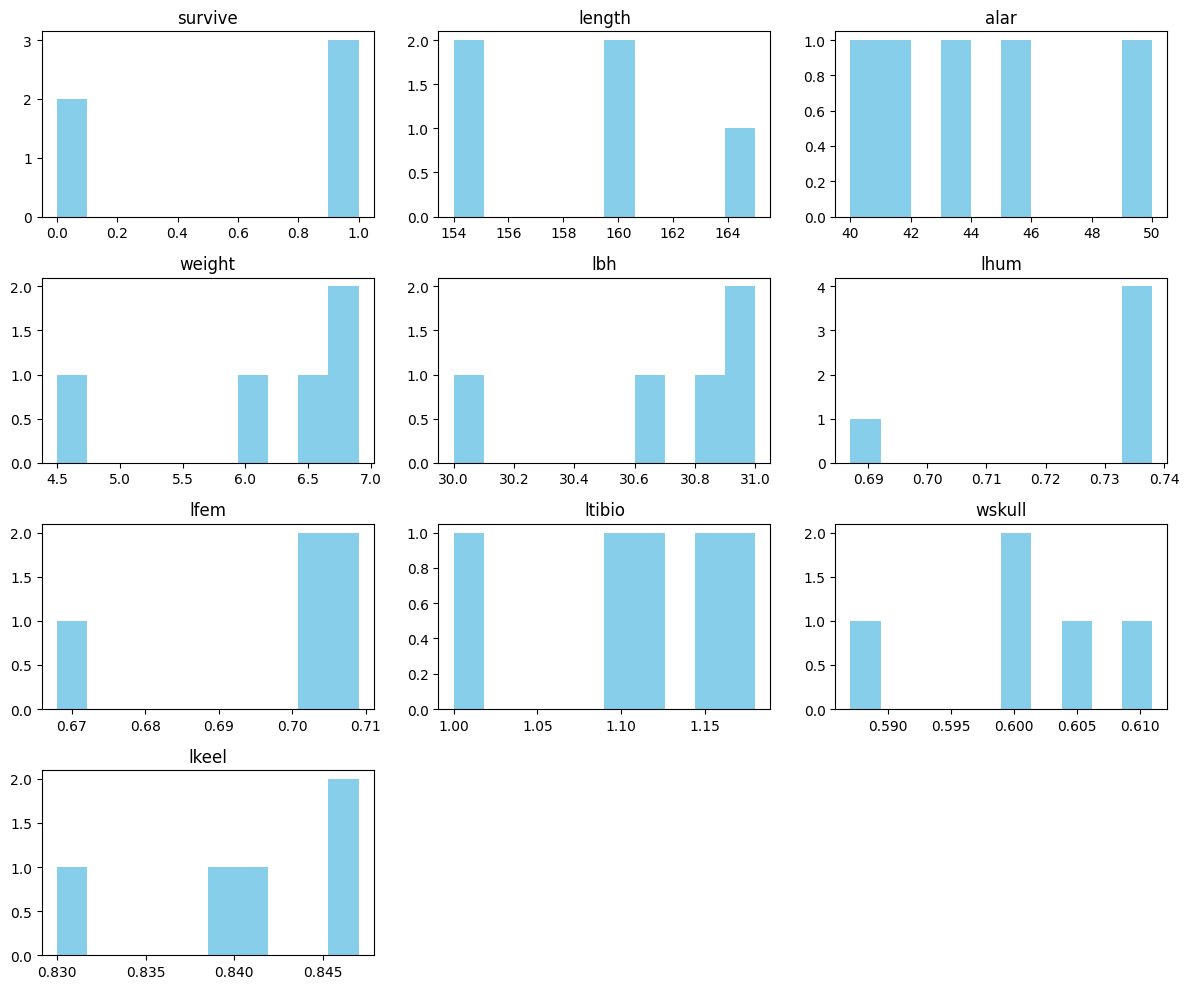

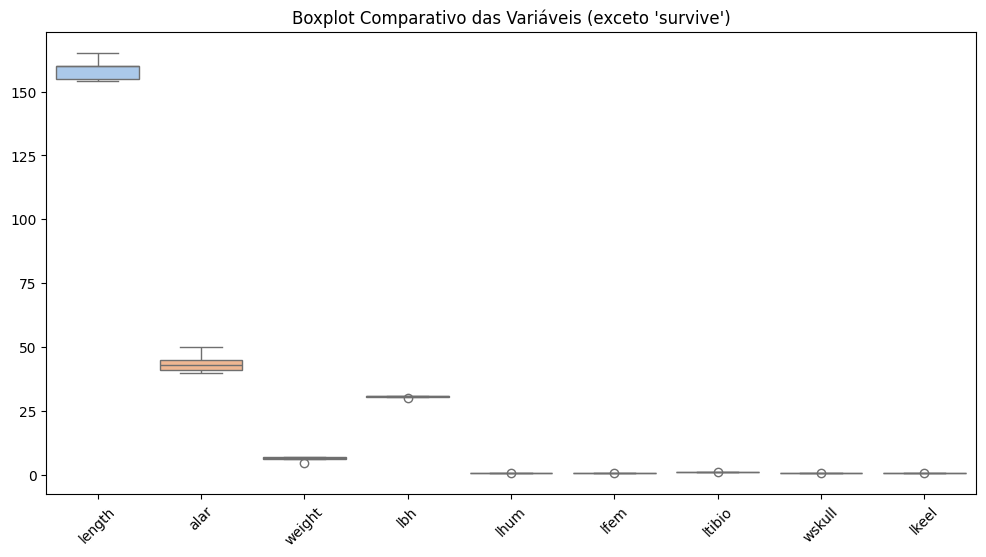

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'survive': [1, 0, 0, 1, 1],
    'length': [154, 165, 160, 160, 155],
    'alar': [41, 40, 45, 50, 43],
    'weight': [4.5, 6.5, 6.1, 6.9, 6.9],
    'lbh': [31.0, 31.0, 30.0, 30.8, 30.6],
    'lhum': [0.687, 0.738, 0.736, 0.736, 0.733],
    'lfem': [0.668, 0.704, 0.709, 0.709, 0.704],
    'ltibio': [1.000, 1.095, 1.109, 1.180, 1.151],
    'wskull': [0.587, 0.606, 0.611, 0.600, 0.600],
    'lkeel': [0.830, 0.847, 0.840, 0.841, 0.846]
}

df = pd.DataFrame(data)

df.hist(bins=10, figsize=(12, 10), grid=False, color='skyblue')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns='survive'), palette='pastel')
plt.xticks(rotation=45)
plt.title("Boxplot Comparativo das Variáveis (exceto 'survive')")
plt.show()